# Project  - Financial Analytics

The financial analytics project aims to analyze and optimize the financial performance of a company using advanced data analytics techniques. By leveraging historical financial data, the project identifies key trends, patterns, and anomalies to provide actionable insights. Predictive modeling and machine learning algorithms are employed to forecast future financial outcomes and risks. The project also includes the development of interactive dashboards for real-time monitoring and decision support. Ultimately, it seeks to enhance strategic planning and improve overall financial health.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [3]:
data=pd.read_csv("Financial Analytics data.csv",sep=",")
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [4]:
data.shape

(488, 5)

In [5]:
data.size

2440

## Data Exploration - EDA 

In [6]:
#Creating the data frame
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [7]:
#checking the last 5 rows of the dataset
data.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN
487,500,L T Foods,NaN,NaN,NaN


In [8]:
#Shape of the dataset (No of Rows and Columns)
print(data.shape)

print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

(488, 5)
Number of Rows: 488
Number of Columns: 5


In [9]:
#Information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None


In [10]:
#Statistical concepts of the dataset
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


## Data Cleaning

In [11]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [12]:
#Check for null values
data.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [13]:
#check for duplicated data
data_dup=data.duplicated().any()
data_dup

False

## Data Analysis

In [14]:
data['Market Capital per Sale']=data['Mar Cap - Crore']/data['Sales Qtr - Crore']

In [15]:
print("MArket Capital per sale:")
print(data['Market Capital per Sale'])

MArket Capital per sale:
0       5.845474
1      18.240676
2      23.465685
3      32.847382
4      17.190535
         ...    
483     3.834074
484    12.140490
485     5.912302
486     1.062068
487          NaN
Name: Market Capital per Sale, Length: 488, dtype: float64


In [16]:
#Sort the data frame by sales Qty - Crore
data.sort_values(by='Sales Qtr - Crore',inplace=True)

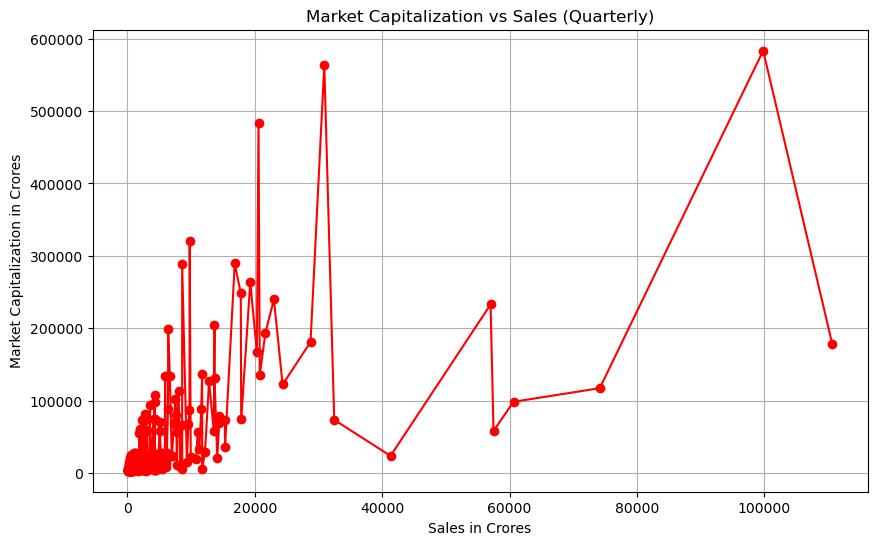

In [17]:
#plotting Market Capitalization Vs Sales
import matplotlib.pyplot as plt
if 'data' in globals() and 'Sales Qtr - Crore' in data and 'Mar Cap - Crore' in data:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Sales Qtr - Crore'],data['Mar Cap - Crore'],marker='o', linestyle='-', color='red')
    plt.title('Market Capitalization vs Sales (Quarterly)')
    plt.xlabel('Sales in Crores')
    plt.ylabel('Market Capitalization in Crores')
    plt.grid(True)
    plt.show()
else:
    print("Data dictionary is not defined or missing required keys.")



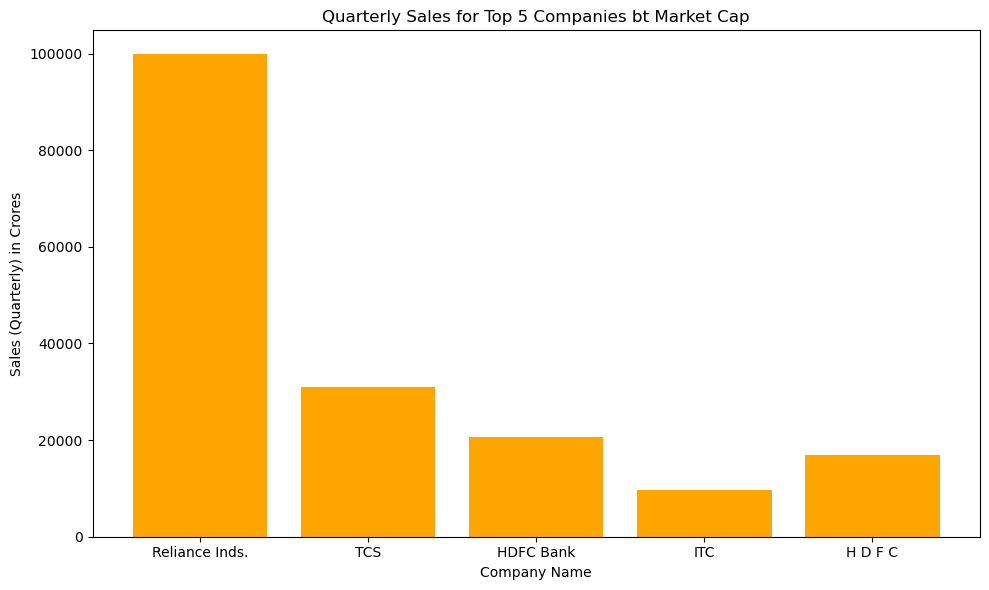

In [18]:
#sort the DataFrame by market Capitalization and select top 5 companies
top_5=data.nlargest(5,'Mar Cap - Crore')
plt.figure(figsize=(10,6))
plt.bar(top_5['Name'],top_5['Sales Qtr - Crore'],color='orange')
plt.title('Quarterly Sales for Top 5 Companies bt Market Cap')
plt.xlabel('Company Name')
plt.ylabel('Sales (Quarterly) in Crores')
plt.tight_layout()
plt.show()


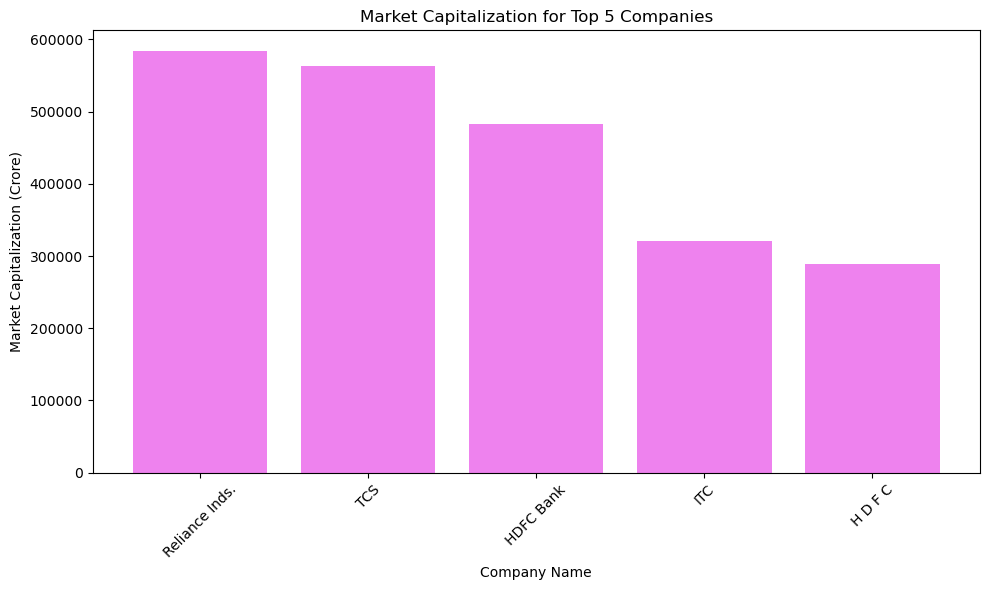

In [19]:
plt.figure(figsize=(10,6))
plt.bar(top_5['Name'],top_5['Mar Cap - Crore'],color='violet')
plt.title('Market Capitalization for Top 5 Companies')
plt.xlabel('Company Name')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

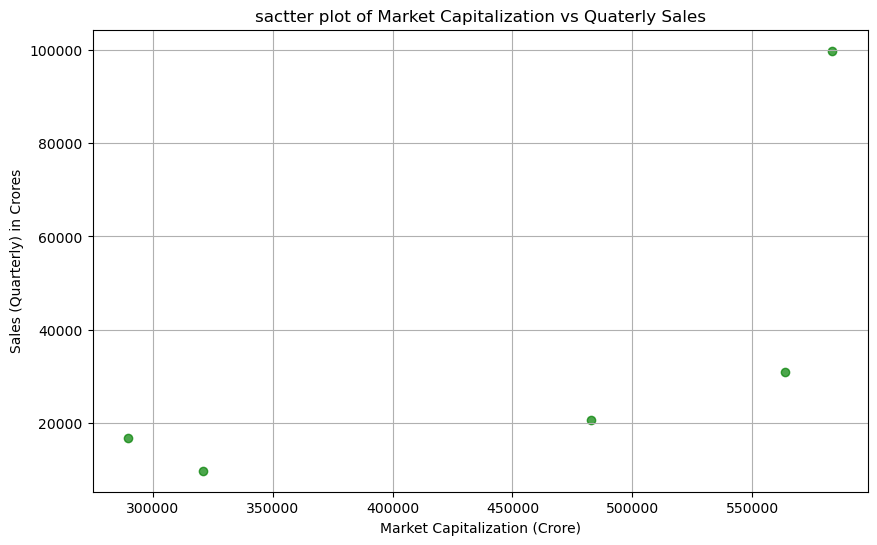

In [20]:
#sort the DataFrame by market Capitalization and select top 5 companies
top_5=data.nlargest(5,'Mar Cap - Crore')
plt.figure(figsize=(10,6))
plt.scatter(top_5['Mar Cap - Crore'],top_5['Sales Qtr - Crore'],color='green',alpha=0.7)
plt.title('sactter plot of Market Capitalization vs Quaterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Sales (Quarterly) in Crores')
plt.grid(True)

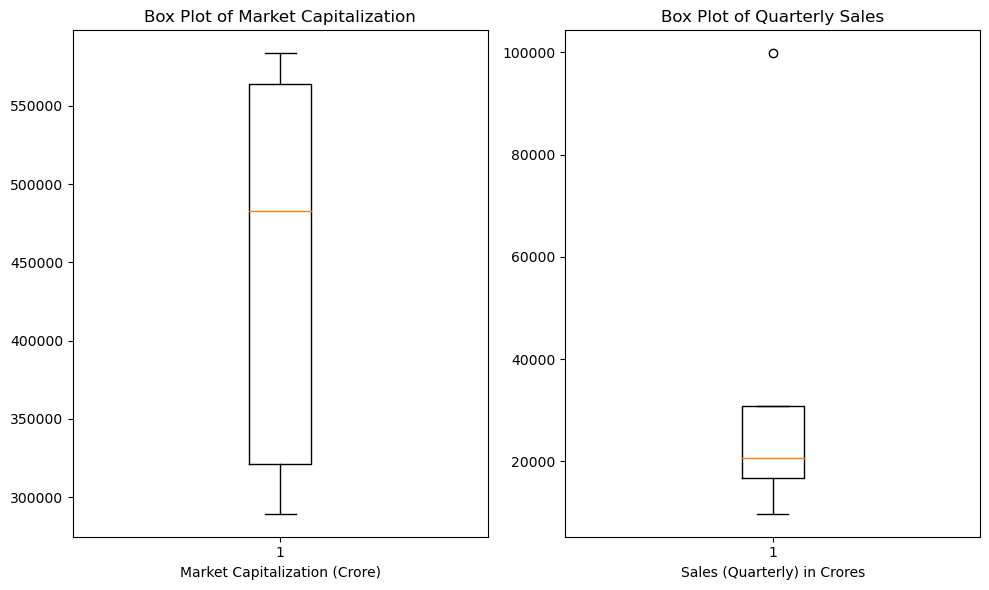

In [21]:
# Create Box Plot for Market Capitalization
plt.figure(figsize=(10,6))

# Box plot for Market Capitalization
plt.subplot(1,2,1)
plt.boxplot(top_5['Mar Cap - Crore'])
plt.title('Box Plot of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')

# Box plot for Quarterly Sales
plt.subplot(1,2,2)
plt.boxplot(top_5['Sales Qtr - Crore'])
plt.title('Box Plot of Quarterly Sales')
plt.xlabel('Sales (Quarterly) in Crores')

# Show the plots
plt.tight_layout()
plt.show()



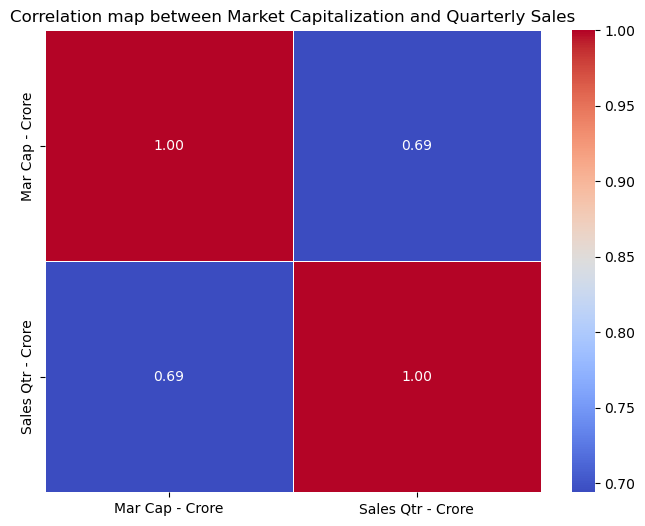

In [23]:
# Calculate the correlation matrix
correlation_matrix=top_5[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)
plt.title("Correlation map between Market Capitalization and Quarterly Sales")
plt.show()


The analysis began with a scatter plot to visualize the relationship between Market Capitalization and Quarterly Sales, revealing potential trends in how these two variables interact. Box plots were then created for both Market Capitalization and Quarterly Sales, providing insights into the distribution, central tendency, and presence of any outliers in the data. To quantify the relationship, a correlation matrix was calculated, showing the correlation coefficient between Market Capitalization and Quarterly Sales. This correlation was then visualized using a heatmap, confirming the strength and direction of the correlation between these financial metrics. Overall, these visualizations and statistical measures together offer a comprehensive understanding of how sales performance impacts market capitalization.






